# MTI830 

Projet de session 

Équipe: 
- Marie-Philippe Gill
- Félix Blier 

## Data

The dataset was first introduced by [\[2\] Goetz et al.](https://onlinelibrary.wiley.com/doi/full/10.1002/mds.22379), and the dataset was shared by [\[1\] Tsanas et al.](https://ieeexplore.ieee.org/abstract/document/5339170) on [data.world](https://data.world/uci/parkinsons-telemonitoring/workspace/project-summary?agentid=uci&datasetid=parkinsons-telemonitoring).

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans

import math
import pandas
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

df = pd.read_csv('https://query.data.world/s/pmiss3v44x4dmyrplzrsjo7coaehfc')
df = df.rename(columns={"subject#": "subject_id"})

In [2]:
df

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.160060
1,1,72,0,12.66600,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.108100
2,1,72,0,19.68100,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.210140
3,1,72,0,25.64700,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.332770
4,1,72,0,33.64200,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.193610
5,1,72,0,40.65200,29.435,36.870,0.00353,0.000023,0.00119,0.00159,...,0.214,0.01006,0.01337,0.02263,0.03019,0.009438,22.946,0.53949,0.57243,0.195000
6,1,72,0,47.64900,29.682,37.363,0.00422,0.000024,0.00212,0.00221,...,0.445,0.02376,0.02621,0.03488,0.07128,0.013260,22.506,0.49250,0.54779,0.175630
7,1,72,0,54.64000,29.928,37.857,0.00476,0.000025,0.00226,0.00259,...,0.212,0.00979,0.01462,0.01911,0.02937,0.027969,22.929,0.47712,0.54234,0.238440
8,1,72,0,61.66900,30.177,38.353,0.00432,0.000029,0.00156,0.00207,...,0.371,0.01774,0.02134,0.03451,0.05323,0.013381,22.078,0.51563,0.61864,0.200370
9,1,72,0,68.68800,30.424,38.849,0.00496,0.000027,0.00258,0.00253,...,0.310,0.02030,0.01970,0.02569,0.06089,0.018021,22.606,0.50032,0.58673,0.201170


## Objective 1: Data understanding

- `Subject#` : Subject id 
- `age`: Age 
- `test_time`: Time since recruitment into the trial. The integer part is the number of days since recruitment.

The data use UPDRS scores as the gold standart. You can see an example of UPDRS questionnaire [here](https://img.medscape.com/fullsize/701/816/58977_UPDRS.pdf).

- `motor_UPDRS`: Clinician's motor UPDRS score, linearly interpolated. It refers to UPDRS-III, which are questions 18 to 31 in the UPDRS test. The minimum of points is 0 and maximum is 56 as the answers range from 0 to 4 points.

- `total_UPDRS`: Clinician's total UPDRS score, linearly interpolated. The total points of UPDRS can go from 0 to 199 points. 

The 16 following are biomedical voice measures. [1]

Jitter : Cycle-to-cycle variability in F0

- `Jitter(%)` : Jitter as a percentage
- `Jitter(Abs)`: Absolute jitter in microseconds
- `Jitter:RAP`: Relative amplitude perturbation
- `Jitter:PPQ5`: Five point period perturbation quotient
- `Jitter:DDP`: Differences between cycles, divided by the average periode

Shimmer : Cycle-to-cycle variability amplitude

- `Shimmer`: Local shimemr
- `Shimmer(dB)`: Local shimemr in decibels
- `Shimmer:APQ3`: Three point Amplitude Perturbation Quotient
- `Shimmer:APQ5`: TFive point Amplitude Perturbation Quotient
- `Shimmer:APQ11`: 11-point Amplitude Perturbation Quotient
- `Shimmer:DDA`: Difference between the amplitudes od consecutive periods

HArmonic and noise ratio
- `NHR`: Harmonics-to-noise ratio
- `HNR`: Noise-to-harmonics ratio

Speech signal processing methods
- `RPDE`: Recurence period density entropy is the ability of the vocal folds to sustain simple vibration
- `DFA`: Detrended fluctuation analysis is the extent of turbulent noise in the speech
signal
- `PPE`: Pitch period entropy is the impaired control of stable pitch during sustained phonation 

There were 5,875 voice recordings. The aim of the provided dataset is to predict the motor and total UPDRS score from the 16 voice measures. 

Recordings are made at home using an At-Home Testing Device (AHTD).

The speech test is designed to take 4 minutes to execute.

The test is executed weekly.

The speech test is composed of three processes : 
- 4 decay of normal intensity phonation for maximally sustained ‘‘Ah’’ phonation [1]
- 2 decay of loud intensity (twice the normal intensity) phonation for maximallysustained ‘‘Ah’’ [1]
- Intensity decays for descriptions of standardized pictures with and without ﬁnger tap-ping motor distraction. [2]

The patients in this study were in early-stage and unmedicated Parkinson's Disease patients. 

52 patients were enrolled in the study, but only 50 completed the 6-month period. From those, 48 remained without medication. 

The initial study reported "UPDRS motor scores significantly worsened over the 6 months" [2].

### Questions à répondre

- C'est quoi "linaerly interpolated', je comprends pas comment ça a été utilisé. Est-ce dans le modèle de régression utilisé par l'étude? : Ça signifie que le score motor UPDRS est proportiellement linéaire à la gravité de la maladie du patient (un patient ayant un score UPDRS de fois plus levé sera 2 fois plus touché par la maladie qu'un autre patient).


## Data Visualization

### Exploration des attributs et de leurs valeurs 

- Attributs qualitatifs : nominal, binaire, ordinal ? 
- Quantitatif : discret, continu ? 

Qualitatif :
    - Binaire : sex
    - Nominal : subject_id, age
Discrètes :
    - discret : tous les autres attributs

### Mesures de tendance centrale 

Comme mentionné dans le cours 4, il est toujours intéressant de s'informer sur notre dataset en utilisant des mesures de tendances centrales, en utilisant par exemple : 
- Moyenne
- médiane
- mode
- mid-range (moyenne entre le min et le max)
- variance
- écart type 

Comme notre dataset est contenu dans un `DataFrame`, en python, on peut utiliser l'attribut `.describe()` pour obtenir ces informations sur les features de notre dataset.

In [3]:
df.sex.value_counts()

0    4008
1    1867
Name: sex, dtype: int64

La base de donnée contien 4008 enregistrements masculins et 1867 enregistrement féminins

In [4]:
df.describe()

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
count,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,...,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000,5875.000000
mean,21.494128,64.804936,0.317787,92.863722,21.296229,29.018942,0.006154,0.000044,0.002987,0.003277,...,0.310960,0.017156,0.020144,0.027481,0.051467,0.032120,21.679495,0.541473,0.653240,0.219589
std,12.372279,8.821524,0.465656,53.445602,8.129282,10.700283,0.005624,0.000036,0.003124,0.003732,...,0.230254,0.013237,0.016664,0.019986,0.039711,0.059692,4.291096,0.100986,0.070902,0.091498
min,1.000000,36.000000,0.000000,-4.262500,5.037700,7.000000,0.000830,0.000002,0.000330,0.000430,...,0.026000,0.001610,0.001940,0.002490,0.004840,0.000286,1.659000,0.151020,0.514040,0.021983
25%,10.000000,58.000000,0.000000,46.847500,15.000000,21.371000,0.003580,0.000022,0.001580,0.001820,...,0.175000,0.009280,0.010790,0.015665,0.027830,0.010955,19.406000,0.469785,0.596180,0.156340
50%,22.000000,65.000000,0.000000,91.523000,20.871000,27.576000,0.004900,0.000035,0.002250,0.002490,...,0.253000,0.013700,0.015940,0.022710,0.041110,0.018448,21.920000,0.542250,0.643600,0.205500
75%,33.000000,72.000000,1.000000,138.445000,27.596500,36.399000,0.006800,0.000053,0.003290,0.003460,...,0.365000,0.020575,0.023755,0.032715,0.061735,0.031463,24.444000,0.614045,0.711335,0.264490
max,42.000000,85.000000,1.000000,215.490000,39.511000,54.992000,0.099990,0.000446,0.057540,0.069560,...,2.107000,0.162670,0.167020,0.275460,0.488020,0.748260,37.875000,0.966080,0.865600,0.731730


Ainsi, on peut constater que notre dataset contient 5875 enregistrements pour 42 patients différents. 

Ceux-ci ont en moyenne 64.8 ans. Le patient le plus jeune a 36 ans, et le plus vieux a 85 ans. 

La moyenne d'age est assez près du entre qui est 60.5 ans. L'écart type est quand à elle assez élevée.

Il est intéressant de visualiser la distribution de l'age des patients grace a un histogramme.

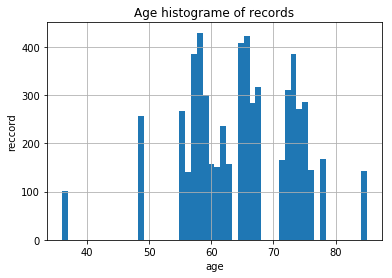

In [5]:
df.hist('age', bins=52,)

plt.ylabel('reccord')
plt.xlabel('age')
plt.title('Age histograme of records')

plt.show()

Dans l'histogramme, l'axe des abscisse représente l'age du patient et l'axe des ordonnées, le nombre d'enregistrement.

On observe ici que la plupart des patients ont pres de 58 ans, 65 ans et 75 ans.

L'histogramme des résultats des test UPDRS donne aussi une idée sur l'etat des patients

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1BD35D908>]],
      dtype=object)

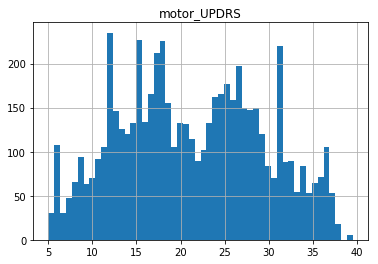

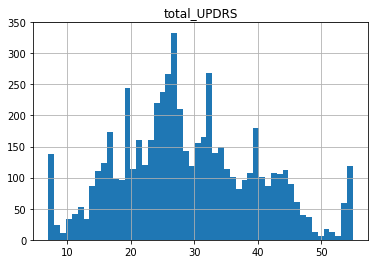

In [6]:
df.hist('motor_UPDRS', bins=52)

df.hist('total_UPDRS', bins=52)

Dans l'histogramme, l'axe des abscisse représente l'age du patient et l'axe des ordonnées, le nombre d'enregistrement.

Le score total de UPDRS semble suivre une loi normale de moyenne 30 


## QQ Plot

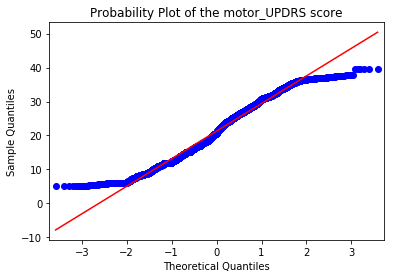

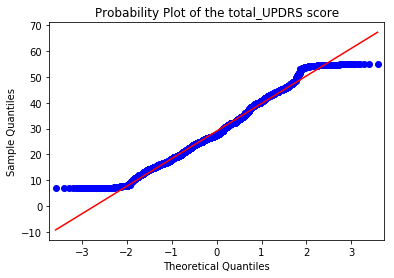

In [7]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 

sm.qqplot(df['motor_UPDRS'], line='s') 
py.title('Probability Plot of the motor_UPDRS score')

sm.qqplot(df['total_UPDRS'], line='s') 
py.title('Probability Plot of the total_UPDRS score')

py.show() 

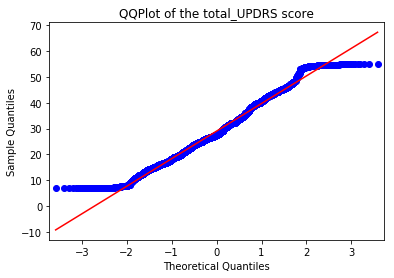

In [8]:
sm.qqplot(df['total_UPDRS'], line='s') 
py.title('QQPlot of the total_UPDRS score')
py.show() 

## Bloxplot - Données aberrantes 

In [9]:
print(df.keys())

Index(['subject_id', 'age', 'sex', 'test_time', 'motor_UPDRS', 'total_UPDRS',
       'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP',
       'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE'],
      dtype='object')


([<matplotlib.axis.XTick at 0x1b1bde797f0>],
 <a list of 1 Text xticklabel objects>)

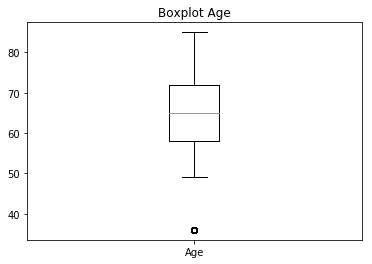

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.age
x2 = df.test_time

data = [x1]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('Boxplot Age')
ax1.boxplot(data)
plt.xticks([1], ['Age'])

([<matplotlib.axis.XTick at 0x1b1bddddac8>],
 <a list of 1 Text xticklabel objects>)

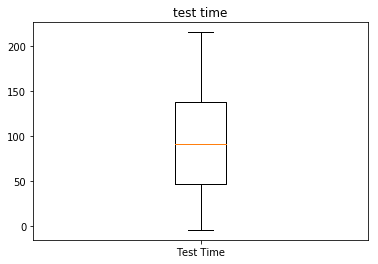

In [11]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.age
x2 = df.test_time

data = [x2]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('test time')
ax1.boxplot(data)
plt.xticks([1], ['Test Time'])

([<matplotlib.axis.XTick at 0x1b1bd431e48>,
 <a list of 2 Text xticklabel objects>)

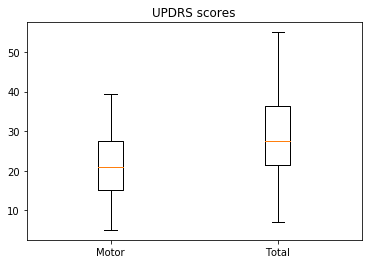

In [12]:
import numpy as np 
import matplotlib.pyplot as plt
x1 = df.motor_UPDRS
x2 = df.total_UPDRS

data = [x1,x2]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('UPDRS scores')
ax1.boxplot(data)
plt.xticks([1, 2], ['Motor', 'Total'])

([<matplotlib.axis.XTick at 0x1b1bcef0ac8>,
 <a list of 6 Text xticklabel objects>)

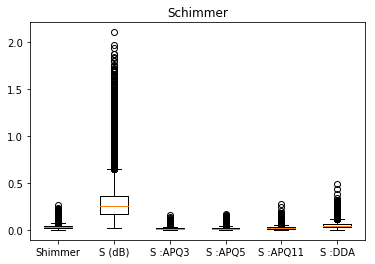

In [13]:
# Schimmer

data = [df['Shimmer'],df['Shimmer(dB)'], df['Shimmer:APQ3'], df['Shimmer:APQ5'], df['Shimmer:APQ11'], df['Shimmer:DDA']]
#data = [x1, x2, x3, x4, x5, x6, x7, x8, x9]

fig1, ax1 = plt.subplots()
ax1.set_title('Schimmer')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6], ['Shimmer', 'S (dB)', 'S :APQ3', 'S :APQ5', 'S :APQ11', 'S :DDA'])

([<matplotlib.axis.XTick at 0x1b1bdded400>,
 <a list of 5 Text xticklabel objects>)

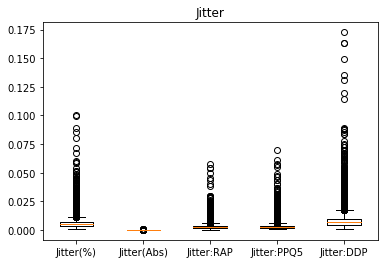

In [14]:
# Jitter

data = [df['Jitter(%)'],df['Jitter(Abs)'], df['Jitter:RAP'], df['Jitter:PPQ5'], df['Jitter:DDP']]

fig1, ax1 = plt.subplots()
ax1.set_title('Jitter')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP', 'Jitter:PPQ5', 'Jitter:DDP'])

([<matplotlib.axis.XTick at 0x1b1bde8edd8>,
 <a list of 5 Text xticklabel objects>)

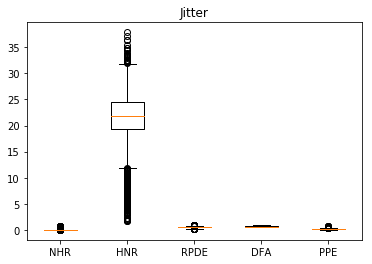

In [15]:
data = [df['NHR'],df['HNR'], df['RPDE'], df['DFA'], df['PPE']]

fig1, ax1 = plt.subplots()
ax1.set_title('Jitter')
ax1.boxplot(data)
plt.xticks([1, 2, 3, 4, 5], ['NHR', 'HNR', 'RPDE', 'DFA', 'PPE'])

### Motor UPDRS Score Over time since recruitment in the study for the subjects  

2.2.2


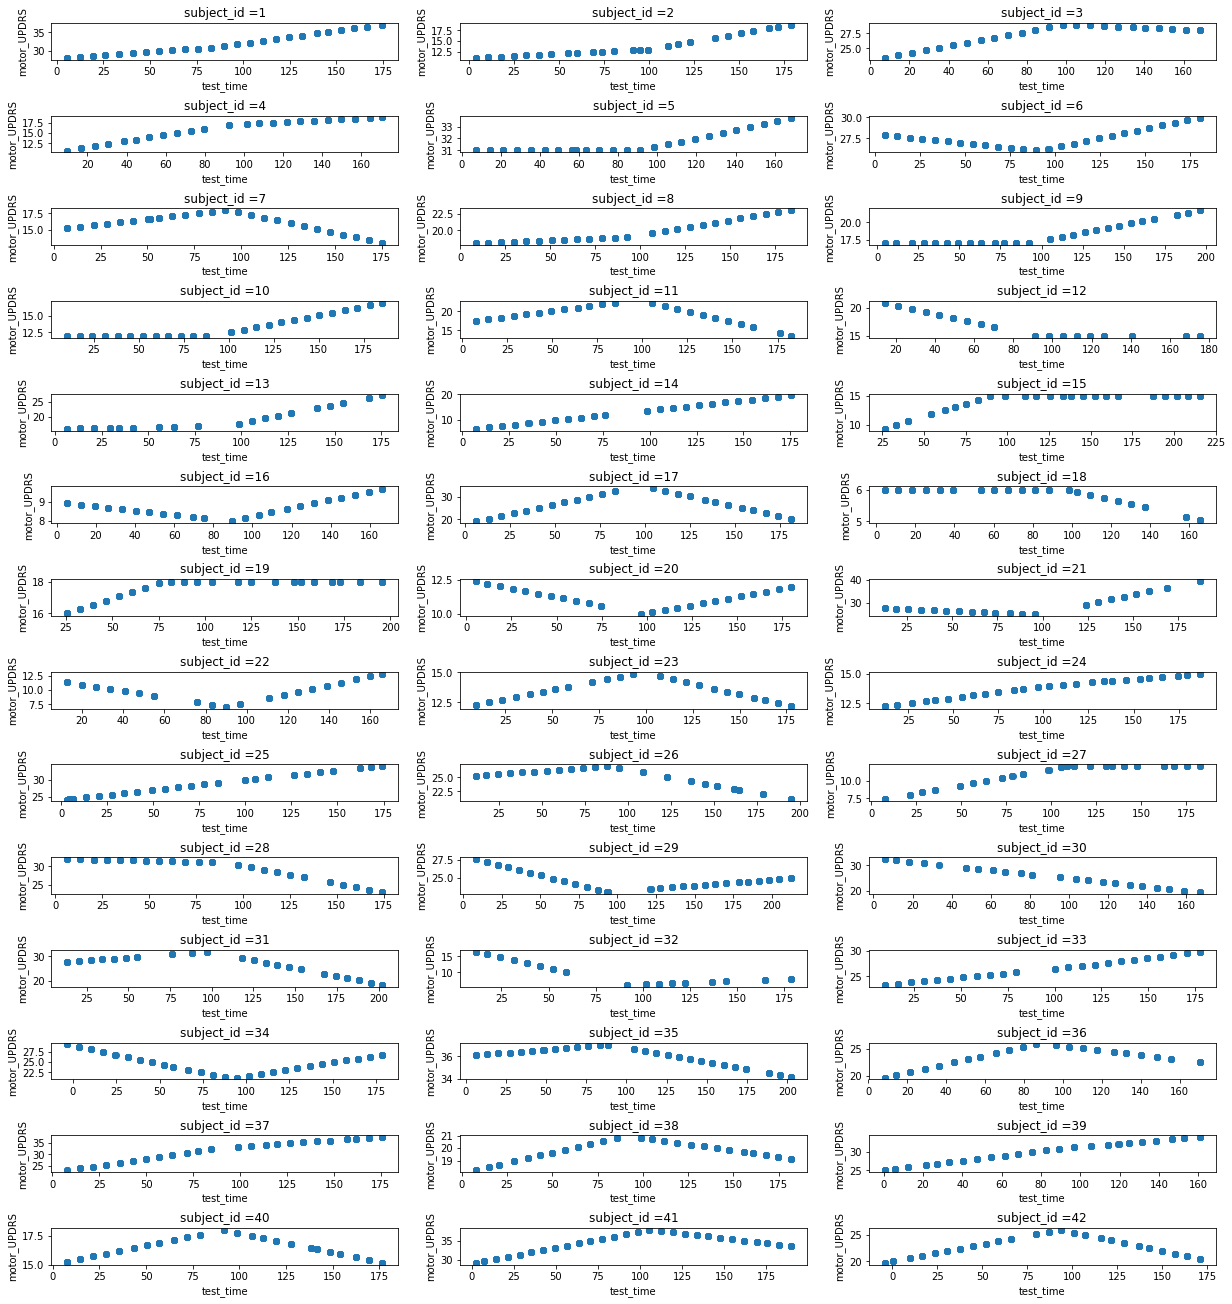

In [16]:
# Source of the code for the subplots:
# https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/markevery_demo.html#sphx-glr-gallery-lines-bars-and-markers-markevery-demo-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
print(matplotlib.__version__)

# define the figure size and grid layout properties
figsize = (17,18)
cols = 3
rows = 14
# define the data for cartesian plots
# delta = 0.11
# x = np.linspace(0, 10 - 2 * delta, 200) + delta
# y = np.sin(x) + 1.0 + delta


def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(1,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].motor_UPDRS))
fig2.savefig('motor_updrs_time_test.png')

The next plots are showing for every subject, their motor UPDRS over the time since they were recruited into the trial. The X axis represents the number of days since the recruitment (`test_time`) and the Y axis is their `motor_UPDRS`. 

At first, I would have expected the motor UPDRS score to worsen over time as this is what would happen in a degenerative disease. However, ****REF**** noted that for some patients, surprisingly, their motor UPDRS is actually worsening in the middle of the experiments (at the 3 months visit) and then improving tremendously at the 6-months evaluation of the UPDRS score. 

Generating those graphs makes me want to go further in this analysis and actually quantify how many patients:

- How many patients worsen from the beginning to the end of the study? 
- How many improved ? 



<font color='red'>TODO FÉlix: As-tu une idée pourquoi un patient aurait deux fois la même valeur dans test_time? Le patient 1 a deux fois la même valeur minimum. Par contre, les features vocales n'ont pas les mêmes valeurs</font>

In [5]:
nb_subjects_worsen = 0
nb_subjects_improved = 0 
nb_subjects_midpoint_worst_end_well = 0 

df_testtime_filtered = []


# Go through all the 42 subject_id of the dataset 
for subject_id in range(1,43):
#     print('Subject_id : ', subject_id)
    # Filter the dataframe to only the recordings of the current subject 
    subject_df = df[(df['subject_id'] == subject_id)]

    # Then we will filter another time the subject_df because we want the value of the motor UPDRS
    # when test_time is at its minimum, median and max value
    min_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].min()]
    #display(min_subject_df)
    df_testtime_filtered.append(min_subject_df.iloc[0])
    min_value = min_subject_df.motor_UPDRS.values[0]
    #print('Min : ', min_value)

    # Median uses row nearest to midpoint because otherwise median is a problem on dataframes of even length
    median_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].quantile(interpolation='nearest')]
    #display(median_subject_df)
    df_testtime_filtered.append(median_subject_df.iloc[0])
    median_value = median_subject_df.motor_UPDRS.values[0]
    #print('Median : ', median_value)
    
    max_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].max()]
    df_testtime_filtered.append(max_subject_df.iloc[0])
    #display(max_subject_df)
    max_value = max_subject_df.motor_UPDRS.values[0]
    #print('Max : ', max_value)
    
    if(min_value < max_value):
        nb_subjects_worsen += 1
    elif(max_value < min_value):
        nb_subjects_improved += 1
    if(median_value > max_value):
        nb_subjects_midpoint_worst_end_well += 1
    
print('Nb subjects who got worst between start and the end of the trial: ', nb_subjects_worsen)
print('Nb subjects who are even better than when they started the trial : ', nb_subjects_improved)
print('Nb subjects who improved between midpoint and end : ', nb_subjects_midpoint_worst_end_well)

Nb subjects who got worst between start and the end of the trial:  27
Nb subjects who are even better than when they started the trial :  15
Nb subjects who improved between midpoint and end :  17


In [18]:
pd.DataFrame(df_testtime_filtered)

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1.0,72.0,0.0,5.64310,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
12,1.0,72.0,0.0,89.63500,31.309,40.412,0.00524,0.000033,0.00235,0.00251,...,0.240,0.01176,0.01395,0.02019,0.03528,0.011876,22.203,0.56600,0.60571,0.20984
23,1.0,72.0,0.0,174.66000,36.977,47.970,0.00386,0.000023,0.00178,0.00195,...,0.295,0.01312,0.01514,0.02626,0.03936,0.015298,24.126,0.43806,0.59755,0.20164
149,2.0,58.0,0.0,3.86600,11.078,14.039,0.00600,0.000048,0.00302,0.00294,...,0.331,0.02058,0.02464,0.02778,0.06175,0.019901,20.632,0.54100,0.75905,0.19288
235,2.0,58.0,0.0,90.80100,12.834,14.917,0.00524,0.000041,0.00276,0.00296,...,0.351,0.02406,0.02581,0.03068,0.07217,0.022466,17.017,0.54534,0.76224,0.20882
173,2.0,58.0,0.0,178.80000,18.819,21.650,0.00440,0.000033,0.00230,0.00282,...,0.437,0.02352,0.03349,0.03659,0.07056,0.014770,21.598,0.52999,0.74918,0.21367
294,3.0,57.0,0.0,7.28820,23.437,25.729,0.00565,0.000031,0.00321,0.00325,...,0.246,0.01442,0.01341,0.01500,0.04326,0.029994,24.756,0.34321,0.56409,0.16791
306,3.0,57.0,0.0,91.30200,28.478,34.130,0.00293,0.000023,0.00135,0.00178,...,0.118,0.00631,0.00788,0.01125,0.01892,0.006619,26.742,0.48993,0.58972,0.16835
317,3.0,57.0,0.0,168.27000,28.011,39.947,0.00199,0.000013,0.00087,0.00115,...,0.109,0.00573,0.00707,0.00952,0.01720,0.004082,29.682,0.40309,0.55386,0.10145
438,4.0,74.0,0.0,9.68680,10.737,15.263,0.00410,0.000034,0.00163,0.00235,...,0.273,0.01378,0.01821,0.03138,0.04134,0.021982,20.493,0.70390,0.57545,0.18837


### Total UPDRS Score Over time since recruitment in the study for the subjects  

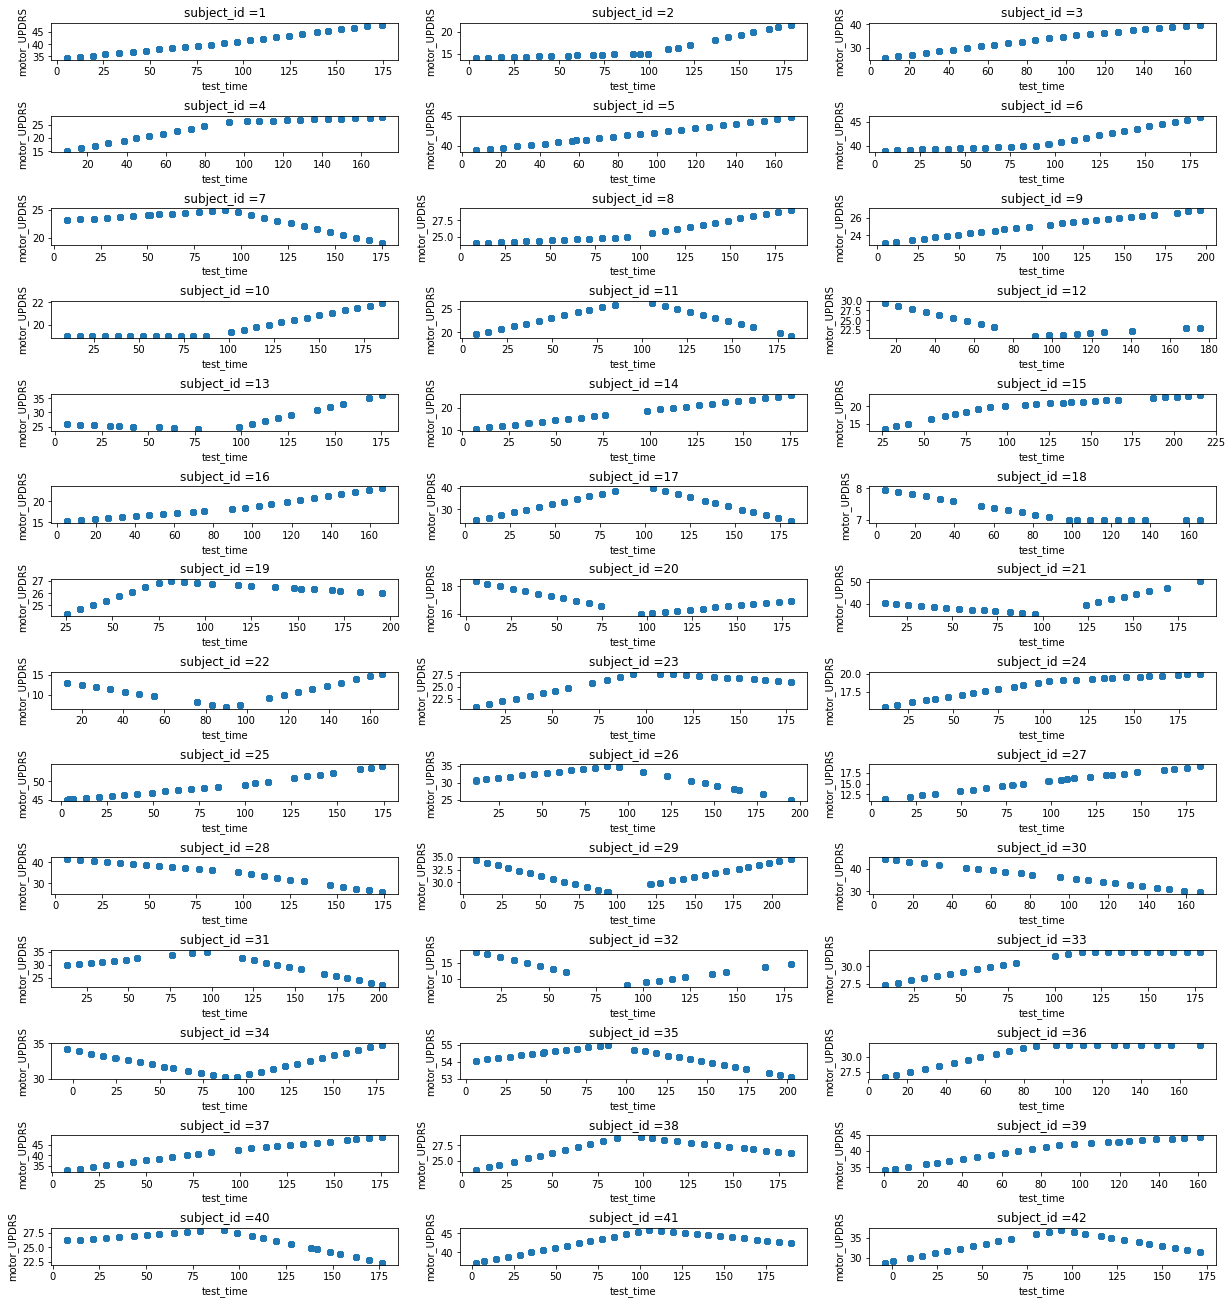

In [19]:
fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(1,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].total_UPDRS))
fig2.savefig('total_updrs_time_test.png')

<font color='red'>TODO Marie: Regarder si df_filtered_3 fonctionne</font>

In [6]:
nb_subjects_worsen = 0
nb_subjects_improved = 0 
nb_subjects_midpoint_worst_end_well = 0 

# Dataframe containing only 3 UPDRS measures per patient. This will be useful to plot graphs 
df_filtered_3_per_subject = []

# Go through all the 42 subject_id of the dataset 
for subject_id in range(1,43):
#     print('Subject_id : ', subject_id)
    # Filter the dataframe to only the recordings of the current subject 
    subject_df = df[(df['subject_id'] == subject_id)]

    # Then we will filter another time the subject_df because we want the value of the motor UPDRS
    # when test_time is at its minimum, median and max value
    min_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].min()]
    df_filtered_3_per_subject.append(min_subject_df)
    #display(min_subject_df)
    min_value = min_subject_df.total_UPDRS.values[0]
    #print('Min : ', min_value)

    # Median uses row nearest to midpoint because otherwise median is a problem on dataframes of even length
    median_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].quantile(interpolation='nearest')]
    df_filtered_3_per_subject.append(median_subject_df)
    #display(median_subject_df)
    median_value = median_subject_df.total_UPDRS.values[0]
    #print('Median : ', median_value)
    
    max_subject_df = subject_df[subject_df['test_time'] == subject_df['test_time'].max()]
    df_filtered_3_per_subject.append(max_subject_df)
    #display(max_subject_df)
    max_value = max_subject_df.total_UPDRS.values[0]
    #print('Max : ', max_value)
    
    if(min_value < max_value):
        nb_subjects_worsen += 1
    elif(max_value < min_value):
        nb_subjects_improved += 1
    if(median_value > max_value):
        nb_subjects_midpoint_worst_end_well += 1

df_filtered_3_per_subject = pd.concat(df_filtered_3_per_subject)

print('Nb subjects who got worst between start and the end of the trial: ', nb_subjects_worsen)
print('Nb subjects who are even better than when they started the trial : ', nb_subjects_improved)
print('Nb subjects who improved between midpoint and end : ', nb_subjects_midpoint_worst_end_well)

Nb subjects who got worst between start and the end of the trial:  29
Nb subjects who are even better than when they started the trial :  13
Nb subjects who improved between midpoint and end :  16


### Filtered 3 data points per subject

In [7]:
df_filtered_3_per_subject

,subject_id,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
24,1,72,0,5.6431,28.199,34.398,0.00348,0.000015,0.00124,0.00133,...,0.113,0.00411,0.00463,0.00949,0.01234,0.009238,27.927,0.37340,0.52499,0.17066
12,1,72,0,89.6350,31.309,40.412,0.00524,0.000033,0.00235,0.00251,...,0.240,0.01176,0.01395,0.02019,0.03528,0.011876,22.203,0.56600,0.60571,0.20984
36,1,72,0,89.6350,31.309,40.412,0.00991,0.000057,0.00417,0.00546,...,0.440,0.01934,0.02627,0.03872,0.05801,0.069650,18.719,0.55590,0.59191,0.39101
61,1,72,0,89.6350,31.309,40.412,0.00423,0.000023,0.00159,0.00180,...,0.162,0.00623,0.00658,0.01093,0.01868,0.041199,24.186,0.48465,0.57380,0.18222
23,1,72,0,174.6600,36.977,47.970,0.00386,0.000023,0.00178,0.00195,...,0.295,0.01312,0.01514,0.02626,0.03936,0.015298,24.126,0.43806,0.59755,0.20164
48,1,72,0,174.6600,36.977,47.970,0.00369,0.000022,0.00149,0.00183,...,0.222,0.01123,0.01306,0.02232,0.03370,0.010868,25.000,0.49219,0.61602,0.18939
73,1,72,0,174.6600,36.977,47.970,0.00508,0.000027,0.00228,0.00258,...,0.290,0.01390,0.01312,0.01911,0.04170,0.026755,24.348,0.53511,0.59545,0.18327
98,1,72,0,174.6600,36.978,47.970,0.00547,0.000024,0.00234,0.00268,...,0.267,0.00912,0.00969,0.01333,0.02735,0.017361,24.543,0.52026,0.53879,0.29135
123,1,72,0,174.6600,36.978,47.970,0.00567,0.000024,0.00295,0.00254,...,0.268,0.01469,0.01323,0.01801,0.04407,0.027539,25.451,0.44728,0.52472,0.22185


### Combien de recordings par patient?

Le nombre d'enregistrements que l'on possède par patient peut être très déterminant. En effet, l'ensemble de données sur lequel on travaille est dans le domaine de la santé, alors les résultats sont très en relation avec le patient. 

C'est pour cette raison que nous nous sommes demandés combien d'enregistrements avons-nous pour chaque patient? La prochaine cellule contient de l'information à ce sujet. 

In [21]:
patient_frequency = df.subject_id.value_counts()
df_patient_frequency = pd.DataFrame({'subject_id':patient_frequency.index, 'count':patient_frequency.values})
df_patient_frequency

,subject_id,count
0,29,168
1,41,165
2,35,165
3,7,161
4,34,161
5,6,156
6,5,156
7,24,156
8,9,152
9,42,150


Grâce à `describe()` encore une fois, on peut analyser justement le nombre d'enregistrements par patients. En moyenne, les patients on 139 enregistrement. Le minimum d'enregistrements qu'un patient possède est 101, ce qui est une bonne nouvelle, puisque le nombre d'enregistrments ne varie pas trop d'un patient à l'autre. Le maximum d'enregistrements pour un patient est de 168. 

In [22]:
df.subject_id.value_counts().describe()

count     42.000000
mean     139.880952
std       15.542550
min      101.000000
25%      130.000000
50%      141.000000
75%      149.750000
max      168.000000
Name: subject_id, dtype: float64

## Objective 2: Data analysis 

### Is there a correlation between the age of the patients and their motor UPDRS score or total score?

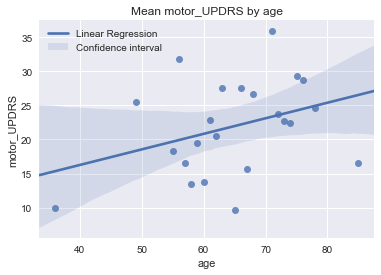

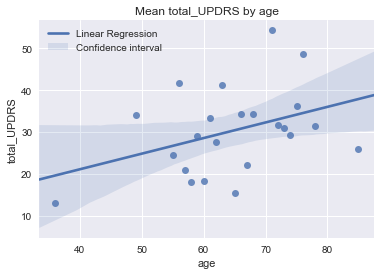

In [23]:
import seaborn as sns; sns.set()
dfage=df.groupby('age',as_index=False).mean()

ax=sns.regplot(x='age',y='motor_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean motor_UPDRS by age')
plt.legend()
plt.show()
ax=sns.regplot(x='age',y='total_UPDRS', data=dfage, line_kws={'label':"Linear Regression"})
ax.collections[1].set_label('Confidence interval')
plt.title('Mean total_UPDRS by age')
plt.legend()
plt.show()

### Is there a correlation between the sex of the patient and their motor UPDRS score or total score?

In [24]:
df.groupby('sex',as_index=False).mean()

,sex,subject_id,age,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,19.072106,65.055389,93.221349,21.469349,29.724055,0.005956,0.000048,0.002824,0.003053,...,0.302085,0.016750,0.019407,0.027162,0.050249,0.025269,21.679985,0.552449,0.661229,0.225827
1,1,26.693626,64.267274,92.095983,20.924581,27.505234,0.006577,0.000036,0.003338,0.003758,...,0.330013,0.018027,0.021727,0.028165,0.054081,0.046827,21.678445,0.517910,0.636088,0.206197


### Can we identify some clusters in the data? (Différence de variabilité entre les échantillons)

<font color='red'>Tu utilises le motor ou le total UPDRS ?</font>

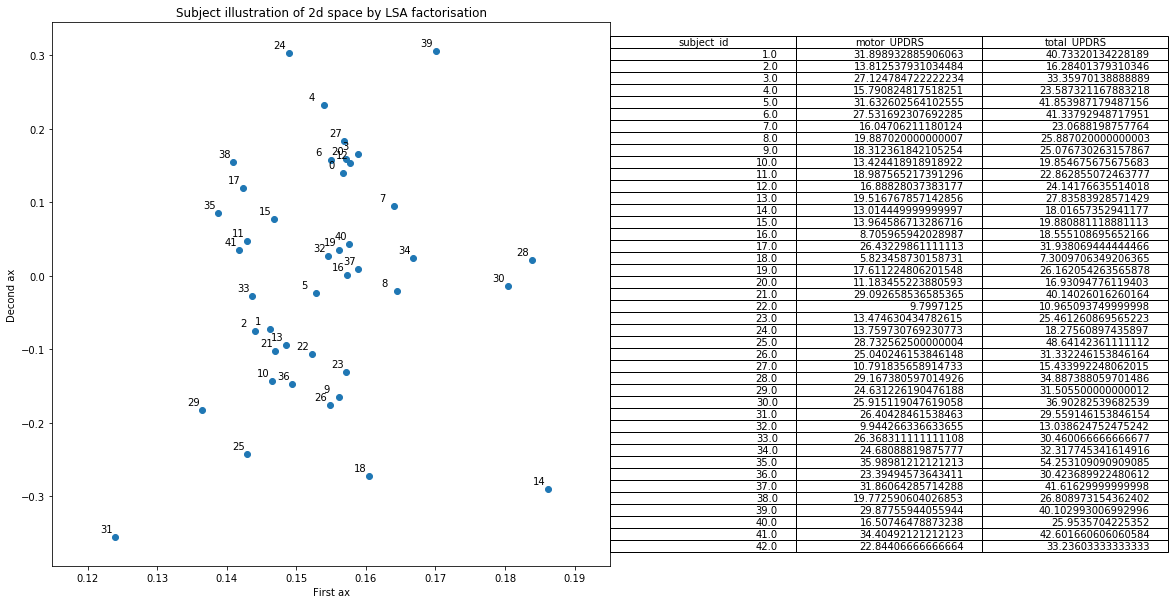

In [4]:
#Moyenne des enregistrement des sujets
Mean=df.groupby('subject_id',as_index=False, ).mean()

#Retirer les données non désirées
X=Mean.drop(columns=['motor_UPDRS','total_UPDRS','subject_id'])

#Application lDA
X=X.transpose()
model_LSA = TruncatedSVD(n_components=2)
U = model_LSA.fit_transform(X)
V = model_LSA.components_

#Représentation
plt.figure(figsize=(10, 10))
plt.scatter(V[0,:],V[1,:])
plt.title("Subject illustration of 2d space by LSA factorisation")
plt.xlabel('First ax')
plt.ylabel('Decond ax')
for i, files_name in enumerate(V[0,:]):
    plt.annotate(i, (V[0,i], V[1,i]), textcoords="offset points", xytext=(-15,5)) 
plt.table(cellText=Mean[['subject_id','motor_UPDRS','total_UPDRS']].values, 
          colLabels=['subject_id','motor_UPDRS','total_UPDRS'], loc='right')
plt.show()


\begin{tabular}{rrr}
\toprule
 subject\_id &  motor\_UPDRS &  total\_UPDRS \\
\midrule
          1 &    31.898933 &    40.733201 \\
          2 &    13.812538 &    16.284014 \\
          3 &    27.124785 &    33.359701 \\
          4 &    15.790825 &    23.587321 \\
          5 &    31.632603 &    41.853987 \\
          6 &    27.531692 &    41.337929 \\
          7 &    16.047062 &    23.068820 \\
          8 &    19.887020 &    25.887020 \\
          9 &    18.312362 &    25.076730 \\
         10 &    13.424419 &    19.854676 \\
         11 &    18.987565 &    22.862855 \\
         12 &    16.888280 &    24.141766 \\
         13 &    19.516768 &    27.835839 \\
         14 &    13.014450 &    18.016574 \\
         15 &    13.964587 &    19.880881 \\
         16 &     8.705966 &    18.555109 \\
         17 &    26.432299 &    31.938069 \\
         18 &     5.823459 &     7.300971 \\
         19 &    17.611225 &    26.162054 \\
         20 &    11.183455 &    16.930948 \\
         21 &

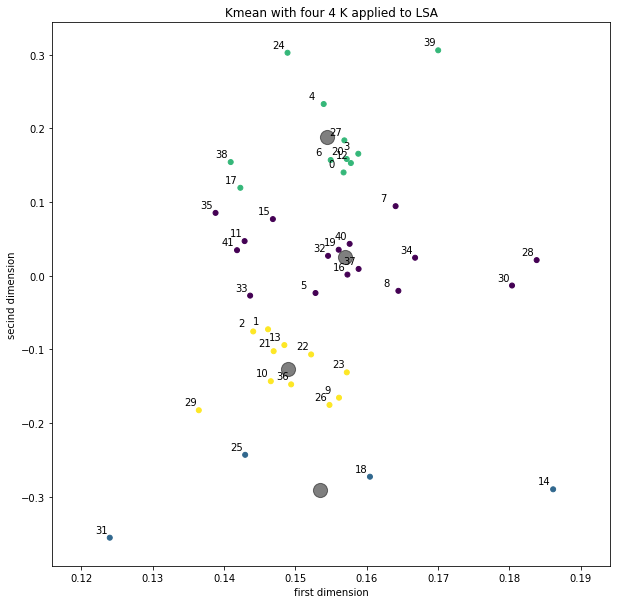

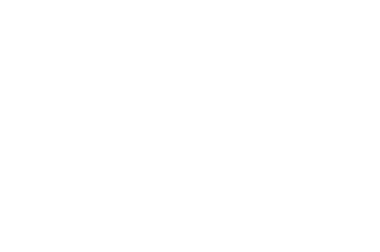

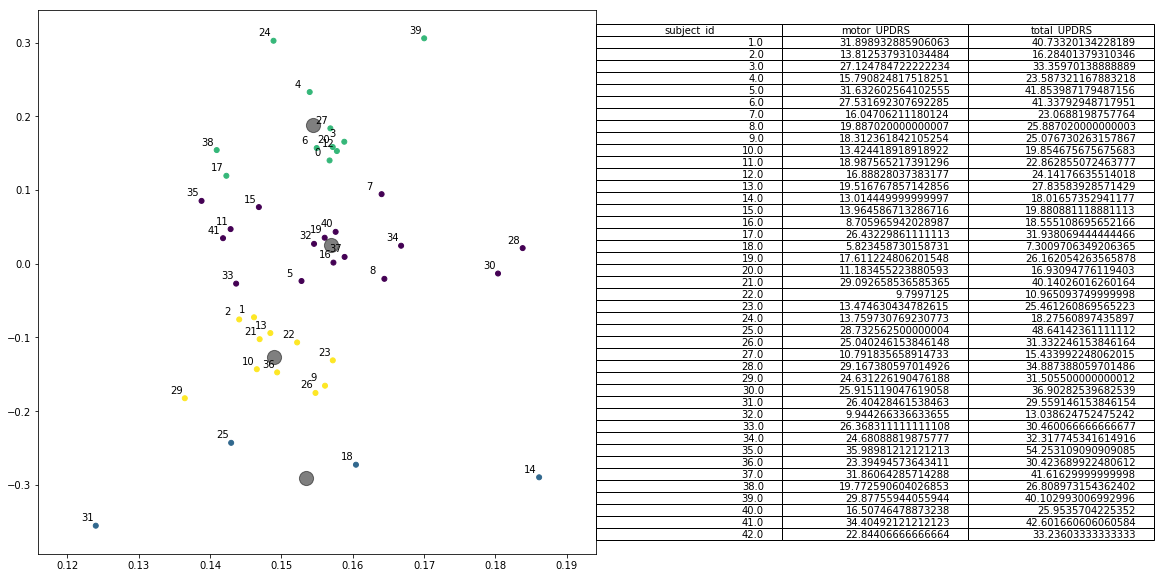

In [33]:
Data=V.transpose()

#Application Clustering
kmeans = KMeans(n_clusters=4)
kmeans.fit(Data)
y_kmeans = kmeans.predict(Data)

#Représentation

plt.figure(1, figsize=(10, 10))
plt.scatter(Data[: , 0], Data[: , 1], c=y_kmeans, s=25, cmap='viridis')
for i, files_name in enumerate(V[0,:]):
    plt.annotate(i, (V[0,i], V[1,i]), textcoords="offset points", xytext=(-15,5)) 
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Kmean with four 4 K applied to LSA')
plt.xlabel('first dimension')
plt.ylabel('secind dimension')

fig= plt.figure()
ax = fig.add_subplot(111)
ax.axis('off')
print(Mean[['subject_id','motor_UPDRS','total_UPDRS']].to_latex(index=False))

plt.figure(3, figsize=(10, 10))
plt.scatter(Data[: , 0], Data[: , 1], c=y_kmeans, s=25, cmap='viridis')
for i, files_name in enumerate(V[0,:]):
    plt.annotate(i, (V[0,i], V[1,i]), textcoords="offset points", xytext=(-15,5)) 
plt.table(cellText=Mean[['subject_id','motor_UPDRS','total_UPDRS']].values, 
          colLabels=['subject_id','motor_UPDRS','total_UPDRS'], loc='right')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# Objective 3: Modélisation

Can we predict the motor UPDRS (or total) score from 16 vocal features?

Source:
* https://medium.com/datadriveninvestor/an-introduction-to-grid-search-ff57adcc0998
    
Intéressant:
* https://stats.stackexchange.com/questions/393330/sklearn-support-vector-regression-test-data-prediction-is-constant

### Splitting the data 

Splitting the data in 80/20. 80% of the data will be for training/development and the remaining 20% will be for test.

Some questions remains though: 
* Is it better to split while making sure train/dev/test all have data associated to all subjects?
* What if we test on the data of a subject we have never seen before?

In [52]:
# prepare dataset with input and output scalers, can be none
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from sklearn.preprocessing import OneHotEncoder
from numpy import mean
from numpy import std

def get_dataset(input_scaler, output_scaler, label="motor"):
    X = df[df.columns.difference(['motor_UPDRS', 'total_UPDRS', 'subject_id'])]
    #X = df[df.columns.difference(['motor_UPDRS', 'total_UPDRS'])]
#     enc = OneHotEncoder(handle_unknown='ignore')
#     enc.fit(X)
    if label == "motor":
        y = df.motor_UPDRS
    else:
        y = df.total_UPDRS
    
    # Split into train and test set 80/20
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    #scale inputs 
    if input_scaler is not None:
        # fit scaler
        input_scaler.fit(X_train)
        # transform training dataset
        X_train = pd.DataFrame(input_scaler.transform(X_train), columns=[X_train.columns])
        # transform test dataset
        X_test = input_scaler.transform(X_test)
    if output_scaler is not None:
        # reshape 1d arrays to 2d arrays
        y_train = y_train.values.reshape(len(y_train), 1)
        y_test = y_test.values.reshape(len(y_test), 1)
        # fit scaler on training dataset
        output_scaler.fit(y_train)
        # transform training dataset
        y_train = output_scaler.transform(y_train)
        # transform test dataset
        y_test = output_scaler.transform(y_test)

    return X_train, X_test, y_train, y_test


### Gridsearch

In [30]:
# 'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#                      'C': [0.1, 1, 10, 100, 1000]},
#                     {'kernel': ['linear'], 'C': [0.1, 1, 10, 100, 1000]}]


# Bigger Gridsearch
# tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                      'epsilon': [0.01, 0.1, 0.5, 1, 10],
#                      'C':  [0.1, 1, 10, 100]},
#                     {'kernel': ['linear'], 'C': [0.1, 1, 10, 100]}]

# Gridsearch because I'm hesitating between rbf or linear kernel 
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3],
                     'epsilon': [1],
                     'C':  [100]},
                    {'kernel': ['linear'], 'C': [0.1]}]

def gridsearch_svr(input_scaler, output_scaler, label="motor"):
    X_train, X_test, y_train, y_test=get_dataset(input_scaler,output_scaler,label)
    gsc = GridSearchCV(
            estimator=SVR(),
            param_grid=tuned_parameters,
            cv=5,
            scoring='neg_mean_squared_error', verbose=0, n_jobs=1)



    grid_result = gsc.fit(X_train, y_train)
    best_params = grid_result.best_params_
    print('---- For input : ', str(input_scaler) ,' output scaler : ', str(output_scaler), ' and label : ', label)
    print(best_params)

### Gridsearch Best Params for label Motor with different pre-processing options

In [31]:
gridsearch_svr(None,None,"motor")

---- For input :  None  output scaler :  None  and label :  motor
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [5]:
gridsearch_svr(None,None,"motor")

# ---- For input :  None  output scaler :  None  and label :  motor
# {'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}

---- For input :  None  output scaler :  None  and label :  motor
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [34]:
gridsearch_svr(None, StandardScaler(),"motor")

/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:57

---- For input :  None  output scaler :  StandardScaler(copy=True, with_mean=True, with_std=True)  and label :  motor
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [36]:
gridsearch_svr(MinMaxScaler(), StandardScaler(),"motor")

/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:57

---- For input :  MinMaxScaler(copy=True, feature_range=(0, 1))  output scaler :  StandardScaler(copy=True, with_mean=True, with_std=True)  and label :  motor
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [37]:
gridsearch_svr(StandardScaler(), StandardScaler(),"motor")

/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:57

---- For input :  StandardScaler(copy=True, with_mean=True, with_std=True)  output scaler :  StandardScaler(copy=True, with_mean=True, with_std=True)  and label :  motor
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


### Gridsearch Best Params for label total with different pre-processing options

In [33]:
gridsearch_svr(None,None,"total")

---- For input :  None  output scaler :  None  and label :  total
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [32]:
gridsearch_svr(None, StandardScaler(),"total")

/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:57

---- For input :  None  output scaler :  StandardScaler(copy=True, with_mean=True, with_std=True)  and label :  total
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [35]:
gridsearch_svr(MinMaxScaler(), StandardScaler(),"total")

/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/marie-philippe/anaconda3/envs/gti770_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:57

---- For input :  MinMaxScaler(copy=True, feature_range=(0, 1))  output scaler :  StandardScaler(copy=True, with_mean=True, with_std=True)  and label :  total
{'C': 100, 'epsilon': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
gridsearch_svr(StandardScaler(), StandardScaler(),"total")

## Going to see how much scaling can help improve results

Reference: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

Different scaling inspiration: https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) # normalizing the features
X_test_scaled = sc.transform(X_test)

print('Let\'s verify the mean is around 0 and the standard deviation is around 1.')
print('Mean : ', np.mean(X_train_scaled))
print('Std dev : ',np.std(X_train_scaled))
# convert back to dataframe format 
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)

Let's verify the mean is around 0 and the standard deviation is around 1.
Mean :  -9.116112120496605e-17
Std dev :  1.0


In [42]:
from sklearn.metrics import mean_squared_error

def train_results(input_scaler, output_scaler, label="motor"):
    X_train, X_test, y_train, y_test = get_dataset(input_scaler, output_scaler, label)
    print('X_train type : ', type(X_train))
#     best_svr = SVR(C=0.1, kernel='linear')
    best_svr = SVR(kernel='rbf', C=1000, epsilon=0.01, gamma=0.0001)
    best_svr.fit(X_train, y_train.ravel())

    train_r2_score = best_svr.score(X_train, y_train)
    print('Training score : ', train_r2_score)

    y_test_pred = best_svr.predict(X_test)
    test_r2_score = best_svr.score(X_test, y_test)
    print('Testing score : ', test_r2_score)
    print('Testing MSE Score : ', mean_squared_error(y_test, y_test_pred))
    
    features_names = X_train.keys()
    features_names = features_names.tolist()
#     print(best_svr.coef_)
    f_importances(best_svr.coef_[0], features_names)
    
#     print(X_test.shape)
#     print(y_test_pred.shape)
#     print(y_test.shape)
#     plt.scatter(X_test.Shimmer, y_test, s=5, color="blue", label="original")
#     plt.scatter(X_test.Shimmer, y_test_pred, lw=2, color="red", label="fitted")
#     plt.legend()
#     plt.show()

<font color='red'>TODO Marie: Pourquoi le MSE est vraiment haut quand unscaled?</font>

### Predicting total UPDRS 

No input scaler, no output scaler
X_train type :  <class 'pandas.core.frame.DataFrame'>
Training score :  0.17614389119137985
Testing score :  0.1830013453878776
Testing MSE Score :  98.70631831039448


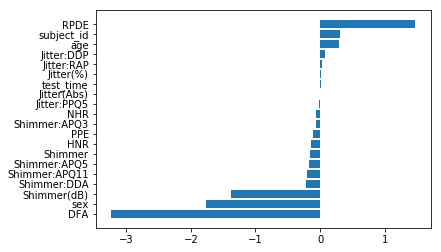

---
Unscaled inputs
X_train type :  <class 'pandas.core.frame.DataFrame'>
Training score :  0.20191260729538707
Testing score :  0.2078027754429823
Testing MSE Score :  0.8478204817011479


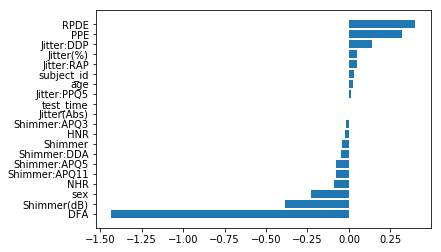

normalized inputs
X_train type :  <class 'pandas.core.frame.DataFrame'>
Training score :  0.20855176783397744
Testing score :  0.2136419966084917
Testing MSE Score :  0.8415712660414112


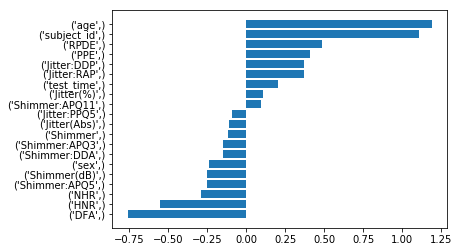

standardized inputs
X_train type :  <class 'pandas.core.frame.DataFrame'>
Training score :  0.22052387732004097
Testing score :  0.22762854999629886
Testing MSE Score :  0.8266026621849405


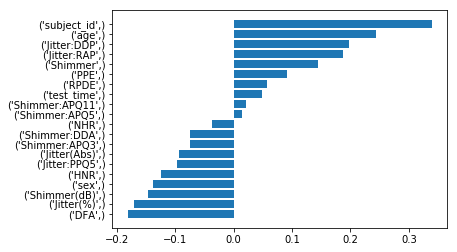

In [81]:
print('No input scaler, no output scaler')
results_unscaled_inputs = train_results(None, None, label="total")

print('---')

# unscaled inputs
print('Unscaled inputs')
results_unscaled_inputs = train_results(None, StandardScaler(), label="total")

# print('---')

# normalized inputs
print('normalized inputs')
results_normalized_inputs = train_results(MinMaxScaler(), StandardScaler(), label="total")

# print('---')

# standardized inputs
print('standardized inputs')
results_standardized_inputs = train_results(StandardScaler(), StandardScaler(), label="total")



In [19]:
print('No input scaler, no output scaler')
results_unscaled_inputs = train_results(None, None, label="total")

print('---')

# unscaled inputs
print('Unscaled inputs')
results_unscaled_inputs = train_results(None, StandardScaler(), label="total")

print('---')

# normalized inputs
print('normalized inputs')
results_normalized_inputs = train_results(MinMaxScaler(), StandardScaler(), label="total")

print('---')

# standardized inputs
print('standardized inputs')
results_standardized_inputs = train_results(StandardScaler(), StandardScaler(), label="total")



No input scaler, no output scaler
Training score :  0.3784264350796862
Testing score :  0.365918630651497
Testing MSE Score :  76.60702636936202
---
Unscaled inputs
Training score :  0.4283640165308449
Testing score :  0.434151995664797
Testing MSE Score :  0.6055783998402235
---
normalized inputs
Training score :  0.20928960427564502
Testing score :  0.21526327034894444
Testing MSE Score :  0.8398361563477756
---
standardized inputs
Training score :  0.2652304771914429
Testing score :  0.2640927277773192
Testing MSE Score :  0.7875781922514236


### Predicting Motor UPDRS

In [22]:
print('No input scaler, no output scaler')
results_unscaled_inputs = train_results(None, None)

print('---')

# unscaled inputs
print('Unscaled inputs')
results_unscaled_inputs = train_results(None, StandardScaler())

print('---')

# normalized inputs
print('normalized inputs')
results_normalized_inputs = train_results(MinMaxScaler(), StandardScaler())

print('---')

# standardized inputs
print('standardized inputs')
results_standardized_inputs = train_results(StandardScaler(), StandardScaler())



No input scaler, no output scaler
Training score :  0.08598113019387277
Testing score :  0.07717743621670414
Testing MSE Score :  64.00922922273243
---
Unscaled inputs
Training score :  0.15105585858891935
Testing score :  0.1395675365964988
Testing MSE Score :  0.9147399692294598
---
normalized inputs
Training score :  0.10432514385378255
Testing score :  0.10852869972458257
Testing MSE Score :  0.9477378695792752
---
standardized inputs
Training score :  0.17056147855960246
Testing score :  0.15984799821918938
Testing MSE Score :  0.8931794753734771


<font color='red'>TODO: Reste à interpréter les scores, dire pourquoi le unscaled inputs performe mieux, expliquer c'est quoi chaque type de standardization, est-ce que les SVR en bénéficie? features deviennent indépendantes?</font>

### Visualizing most important features

In [38]:
# Source: https://stackoverflow.com/questions/41592661/determining-the-most-contributing-features-for-svm-classifier-in-sklearn

from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

features_names = X_train.keys() #['input1', 'input2']
best_svr = SVR(kernel='linear', C=0.1)
best_svr.fit(X_train, y_train.ravel())


NameError: name 'X_train' is not defined

## PCA

### Create covariance matrix

In [28]:
import numpy as np 
from sklearn.decomposition import PCA

X_train, X_test, y_train, y_test = get_dataset(None, None, "motor")

covar_matrix = PCA(n_components=20, whiten=True).fit(X_train)
covar_matrix.fit(X_train)
variance = covar_matrix.explained_variance_ratio_ #calculate variance ratios
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
var #cumulative sum of variance explained with [n] features

array([ 91.9,  96.9,  99.4, 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. , 100. ,
       100. , 100. ])

In [29]:
covar_matrix.components_

array([[ 3.23436756e-05,  3.06344041e-03, -2.38865258e-06,
        -9.84744269e-09, -4.80235620e-06, -1.47095911e-06,
        -1.60216756e-06, -3.45757071e-05, -5.21803276e-06,
        -8.78041240e-05, -1.77064932e-05, -1.40971113e-04,
        -1.53441071e-05, -7.94892317e-06, -1.19707550e-05,
        -2.38450668e-05,  2.35363078e-03, -7.62530024e-05,
         5.36188606e-05,  9.99992518e-01],
       [-5.19922434e-04,  7.81686486e-02, -6.50353642e-05,
        -2.51280504e-07, -9.76642457e-05, -4.27223273e-05,
        -3.25521843e-05, -8.95996885e-04, -1.23940576e-03,
        -1.30499052e-03, -3.34191025e-04, -2.91853330e-03,
        -2.96333697e-04, -1.33731603e-04, -1.99967969e-04,
        -4.01191313e-04,  3.50380138e-02, -1.07900158e-02,
        -9.96259122e-01, -2.69908926e-04],
       [ 6.81686549e-04,  7.29374911e-02, -3.79646605e-05,
        -2.83861218e-07, -4.90929780e-05, -2.07135802e-05,
        -1.63594405e-05, -2.95581419e-04, -1.62166955e-03,
        -1.42347040e-03, -3.9

On peut voir d'après la covariance matrix que si on garde juste les 4 premières features, on explique 100% de la variance.

<font color='red'>Ça veut tu dire quon peut juste garer les 4 premieres feat et on va avoir le meme R2 score?</font>

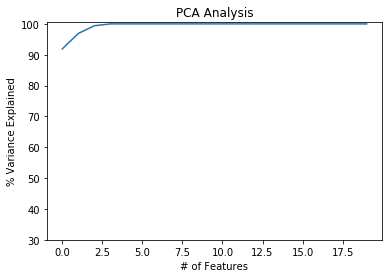

In [31]:
plt.ylabel('% Variance Explained')
plt.xlabel('# of Features')
plt.title('PCA Analysis')
plt.ylim(30,100.5)
plt.style.context('seaborn-whitegrid')


plt.plot(var)

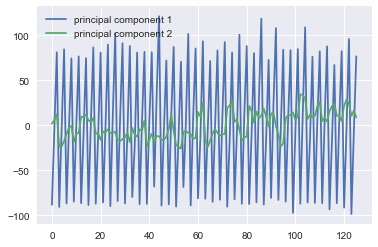

In [39]:
# “””
# Dimensionality Reduction using PCA (Principal Component Analysis) Here n_components = 2 means, transform into a 2-Dimensional dataset.
# “””
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(df_testtime_filtered)


principalDf = pd.DataFrame(data=X_train_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.plot()


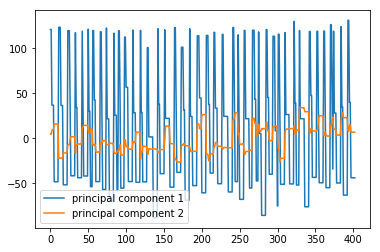

In [33]:
# “””
# Dimensionality Reduction using PCA (Principal Component Analysis) Here n_components = 2 means, transform into a 2-Dimensional dataset.
# “””
pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(df_filtered_3_per_subject)


principalDf = pd.DataFrame(data=X_train_pca, columns = ['principal component 1', 'principal component 2'])
principalDf.plot()



<font color='red'>FIXME: le graph me dit pas grand-chose... J'ai l'impression que c'est parce qu'on a trop de points (+5000) alors ça fait trop un graphique chargé au final. Il faudrait genre utiliser juste 3 points par patients au lieu de tous leurs points </font>

In [41]:
'''
#Moyenne des enregistrement des sujets
Mean=df.groupby('subject_id',as_index=False, ).mean()

#Retirer les données non désirées
X=Mean.drop(columns=['motor_UPDRS','total_UPDRS','subject_id'])

X_train, X_test, y_train, y_test = get_dataset(None,None)

#Application PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)

x_train_flat = X_train.reshape(-1,3072)

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)

pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])

principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train


plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)
'''

'\n#Moyenne des enregistrement des sujets\nMean=df.groupby(\'subject_id\',as_index=False, ).mean()\n\n#Retirer les données non désirées\nX=Mean.drop(columns=[\'motor_UPDRS\',\'total_UPDRS\',\'subject_id\'])\n\nX_train, X_test, y_train, y_test = get_dataset(None,None)\n\n#Application PCA\npca = PCA(n_components=2)\nprincipalComponents = pca.fit_transform(X)\n\nx_train_flat = X_train.reshape(-1,3072)\n\ndf_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)\n\npca_cifar = PCA(n_components=2)\nprincipalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])\n\nprincipal_cifar_Df = pd.DataFrame(data = principalComponents_cifar\n             , columns = [\'principal component 1\', \'principal component 2\'])\nprincipal_cifar_Df[\'y\'] = y_train\n\n\nplt.figure(figsize=(16,10))\nsns.scatterplot(\n    x="principal component 1", y="principal component 2",\n    hue="y",\n    palette=sns.color_palette("hls", 10),\n    data=principal_cifar_Df,\n    legend="full",\n    alpha=0.3\n)\n'

# Multilayer Perceptron

<font color='red'>TODO Félix: Faire comme moi avec input scaler, unscaled input, normalized, standardized etc.</font>
    
<font color='red'>TODO Félix: Faire le graphique loss par epoch / training vs test MSE comme dans le site web.</font>

In [54]:
# fit and evaluate mse of model on test set
def evaluate_model(trainX, trainy, testX, testy):
    # define model
    model = Sequential()
    model.add(Dense(19, input_dim=19, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(output_dim=1, activation='linear'))
    # compile model
    model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01, momentum=0.9))
    # fit model
    model.fit(trainX, trainy, epochs=200, verbose=0)
    # evaluate the model
    test_mse = model.evaluate(testX, testy, verbose=0)
    return test_mse
 
# evaluate model multiple times with given input and output scalers
def repeated_evaluation(input_scaler, output_scaler, n_repeats=30):
    # get dataset
    trainX, testX, trainy, testy = get_dataset(input_scaler, output_scaler)
    # repeated evaluation of model
    results = list()
    for _ in range(n_repeats):
        test_mse = evaluate_model(trainX, trainy, testX, testy)
        print('>%.3f' % test_mse)
        results.append(test_mse)
    return results

In [48]:
# unscaled inputs
results_none = repeated_evaluation(None, None)
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())
# summarize results
print('None: %.3f (%.3f)' % (mean(results_none), std(results_none)))
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))
# plot results
results = [results_none, results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['none', 'unscaled', 'normalized', 'standardized']
plt.boxplot(results, labels=labels)
plt.show()

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>70.051
>69.467
>70.134
>69.619
>69.417
>69.363
>69.371
>69.434
>nan
>nan
>70.040
>69.590
>70.488
>69.407
>69.378
>69.732
>nan
>nan
>69.776
>69.379
>69.670
>69.618
>69.915
>69.873
>69.638
>69.970
>69.411
>69.395
>69.474
>69.846


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>1.064
>1.064
>1.069
>1.063
>1.064
>nan
>1.063
>1.066
>nan
>1.064
>1.063
>1.065
>1.064
>1.077
>1.074
>1.064
>1.063
>1.063
>1.065
>1.063
>1.065
>1.067
>1.063
>1.067
>1.068
>1.063
>1.065
>1.069
>1.068
>1.067


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>0.170
>0.144
>0.177
>0.137
>0.199
>0.270
>0.147
>0.168
>0.161
>0.131
>0.148
>0.158
>0.142
>0.166
>0.151
>0.207
>0.118
>0.171
>0.142
>0.239
>0.141
>0.131
>0.122
>0.165
>0.137
>0.149
>0.230
>0.138
>0.149
>0.206


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>0.116
>0.111
>0.123
>0.117
>0.115
>0.131
>0.145
>0.102
>0.113
>0.135
>0.103
>0.149
>0.093
>0.097
>0.111
>0.098
>0.112
>0.143
>0.132
>0.121
>0.094
>0.101
>0.113
>0.118
>0.089
>0.137
>0.118
>0.123
>0.107
>0.159
None: nan (nan)
Unscaled: nan (nan)
Normalized: 0.164 (0.035)
Standardized: 0.118 (0.017)


NameError: name 'pyplot' is not defined

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>69.474
>69.766
>69.373
>nan
>69.372
>69.645
>69.447
>69.381
>69.400
>69.615
>69.519
>69.373
>69.874
>69.550
>69.444
>69.513
>69.579
>nan
>71.524
>69.434
>69.363
>69.702
>69.436
>70.211
>69.905
>69.531
>69.364
>69.363
>69.535
>69.619


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>1.064
>1.070
>1.063
>1.073
>nan
>1.070
>1.063
>1.063
>1.064
>1.065
>1.063
>1.064
>1.064
>1.063
>1.066
>1.063
>1.068
>1.065
>1.068
>1.064
>1.063
>1.063
>1.064
>1.065
>1.063
>1.071
>1.068
>1.064
>1.065
>1.078


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>0.461
>0.401
>0.408
>0.415
>0.495
>0.391
>0.460
>0.453
>0.544
>0.436
>0.406
>0.439
>0.408
>0.448
>0.387
>0.417
>0.482
>0.431
>0.455
>0.426
>0.407
>0.407
>0.461
>0.373
>0.386
>0.383
>0.436
>0.463
>0.426
>0.380


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="linear", units=1)`
  


>0.349
>0.402
>0.382
>0.365
>0.432
>0.353
>0.390
>0.346
>0.379
>0.403
>0.385
>0.368
>0.418
>0.420
>0.412
>0.340
>0.371
>0.398
>0.396
>0.383
>0.381
>0.348
>0.376
>0.364
>0.338
>0.392
>0.378
>0.401
>0.442
>0.405
None: nan (nan)
Unscaled: nan (nan)
Normalized: 0.429 (0.038)
Standardized: 0.384 (0.027)


C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


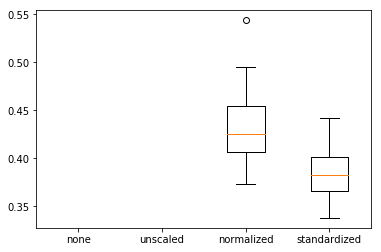

In [55]:
# unscaled inputs
results_none = repeated_evaluation(None, None)
# unscaled inputs
results_unscaled_inputs = repeated_evaluation(None, StandardScaler())
# normalized inputs
results_normalized_inputs = repeated_evaluation(MinMaxScaler(), StandardScaler())
# standardized inputs
results_standardized_inputs = repeated_evaluation(StandardScaler(), StandardScaler())
# summarize results
print('None: %.3f (%.3f)' % (mean(results_none), std(results_none)))
print('Unscaled: %.3f (%.3f)' % (mean(results_unscaled_inputs), std(results_unscaled_inputs)))
print('Normalized: %.3f (%.3f)' % (mean(results_normalized_inputs), std(results_normalized_inputs)))
print('Standardized: %.3f (%.3f)' % (mean(results_standardized_inputs), std(results_standardized_inputs)))
# plot results
results = [results_none, results_unscaled_inputs, results_normalized_inputs, results_standardized_inputs]
labels = ['none', 'unscaled', 'normalized', 'standardized']
plt.boxplot(results, labels=labels)
plt.show()

## Évaluation des résultats

TODO


### Questions de recherche 

- Y a-t-il un lien entre l'âge du patient et le résultat aux tests?
Hypothèse: Il devrait effectivement y avoir un lien, assumant que les patients plus âgés ont un score plus élevé au test.
 


## References

[1] Tsanas, A., Little, M. A., McSharry, P. E., & Ramig, L. O. (2009). Accurate telemonitoring of Parkinson's disease progression by noninvasive speech tests. IEEE transactions on Biomedical Engineering, 57(4), 884-893.

[2] Goetz, C. G., Stebbins, G. T., Wolff, D., DeLeeuw, W., Bronte‐Stewart, H., Elble, R., ... & Wu, A. D. (2009). Testing objective measures of motor impairment in early Parkinson's disease: Feasibility study of an at‐home testing device. Movement Disorders, 24(4), 551-556.

# Drafts

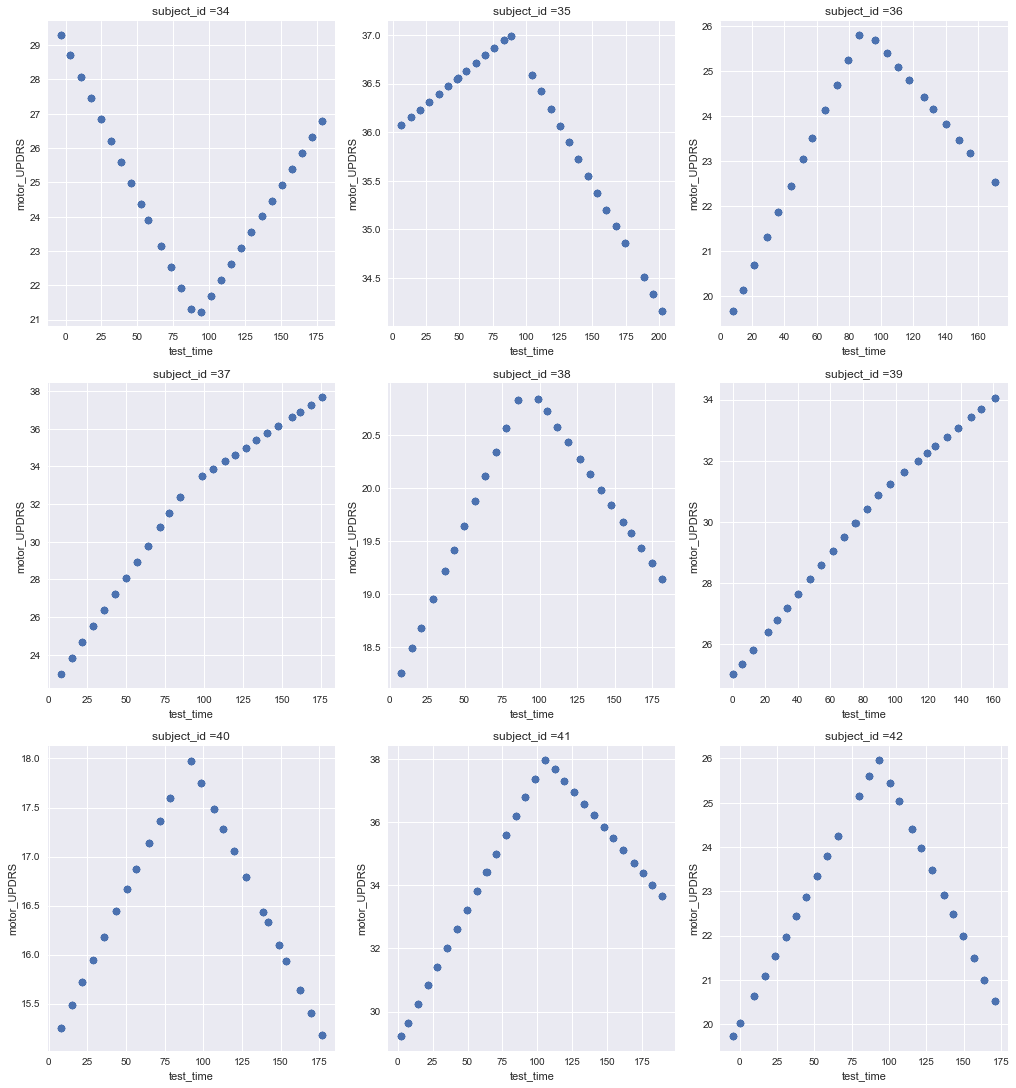

In [42]:
figsize = (14,15)
cols = 3
rows = 3

fig2, axs = plt.subplots(rows, cols, figsize=figsize, constrained_layout=True)
axs = trim_axs(axs, 42)
for ax, subject_id in zip(axs, range(34,43)):
    ax.set_title('subject_id =%s' % str(subject_id))
    ax.set_xlabel('test_time')
    ax.set_ylabel('motor_UPDRS')
#     ax.set_xscale('log')
#     ax.set_yscale('log')
    ax.scatter((df[df['subject_id'] == subject_id].test_time), (df[df['subject_id'] == subject_id].motor_UPDRS))

### Pairplot 

Source : https://medium.com/towards-artificial-intelligence/feature-selection-and-dimensionality-reduction-using-covariance-matrix-plot-b4c7498abd07

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


sns.pairplot(df[df.keys()], size=2.0)

NameError: name 'df' is not defined

### Pairplot 

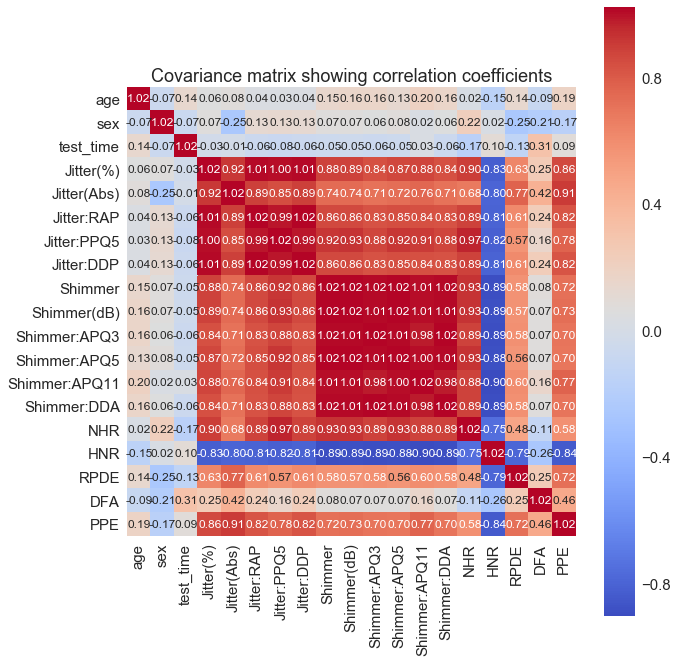

In [45]:
#Moyenne des enregistrement des sujets
Mean=df.groupby('subject_id',as_index=False, ).mean()

#Retirer les données non désirées
X=Mean.drop(columns=['motor_UPDRS','total_UPDRS','subject_id'])

from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(X.values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 cmap='coolwarm',                 
                 yticklabels=X.columns.values,
                 xticklabels=X.columns.values)
plt.title('Covariance matrix showing correlation coefficients', size = 18)
plt.tight_layout()
plt.show()